# Tutorial - Time Series Forecasting - Autoregressive Moving Average (ARMA) 

The goal is to forecast time series with the Autoregressive Moving Average (ARMA)  Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function ARMA with Air Passengers, and 5) Function ARMA with Wine Sales.

References Jason Brownlee - https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [11]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Autoregressive Moving Average (ARMA) Approach with JetRail 

ARMA combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

    p = order of the autoregressive part;
    d = degree of first differencing involved

The method is suitable for univariate time series without trend and seasonal components.

In [16]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

In [17]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train.Count, order=(2, 1))
fit1 = model.fit(disp=False)
y_hat = test.copy()
y_hat['ARMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

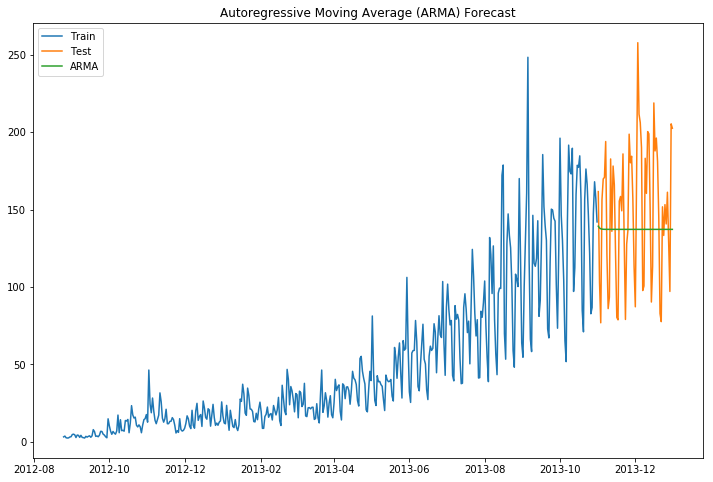

In [18]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['ARMA'], label='ARMA')
plt.legend(loc='best')
plt.title("Autoregressive Moving Average (ARMA) Forecast")
plt.show()

# RMSE Calculation

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.ARMA))
print('RMSE = '+str(rms))

RMSE = 44.97118055858257


# Autoregression (AR) Approach with Air Passagers 

In [21]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [22]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

In [53]:
# Create prediction table
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train.Passengers, order=(3,1))
fit1 = model.fit(disp=False)
y_hat = test.copy()
y_hat['ARMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

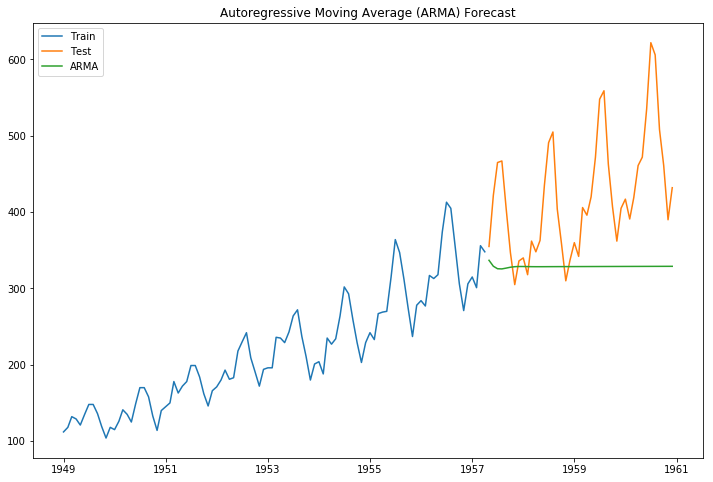

In [54]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['ARMA'], label='ARMA')
plt.legend(loc='best')
plt.title("Autoregressive Moving Average (ARMA) Forecast")
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.ARMA))
print('RMSE = '+str(rms))

RMSE = 119.98629941824274


# Function Autoregression (AR) Approach with variables

In [58]:
def AR_forecasting(mydf,colval,split, AR, MA):
    #print(split)
    import math
    from statsmodels.tsa.arima_model import ARMA
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    model = ARMA(train[colval], order=(AR,MA))
    fit1 = model.fit(disp=False)
    y_hat = test.copy()
    y_hat['ARMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['ARMA'], label='ARMA')
    plt.legend(loc='best')
    plt.title("Autoregressive Moving Average (ARMA) Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.ARMA))
    print('RMSE = '+str(rms))

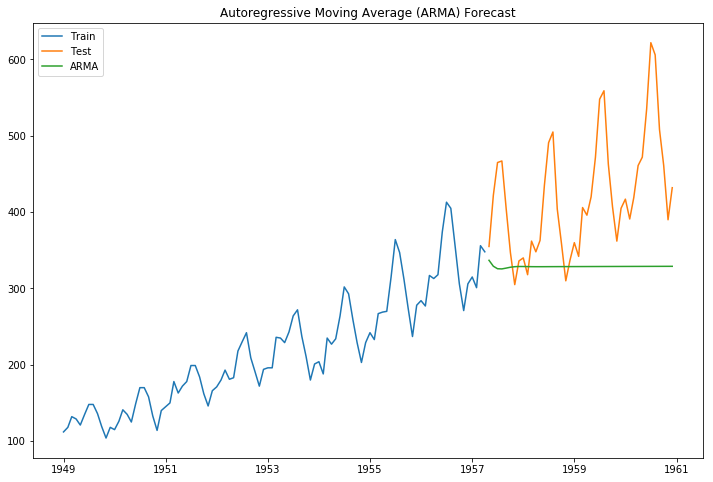

RMSE = 119.98629941824274


In [59]:
AR_forecasting(df,'Passengers',0.7, 3,1)

# Testing Function Autoregression (AR) Approach with Wine Dataset 

In [60]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


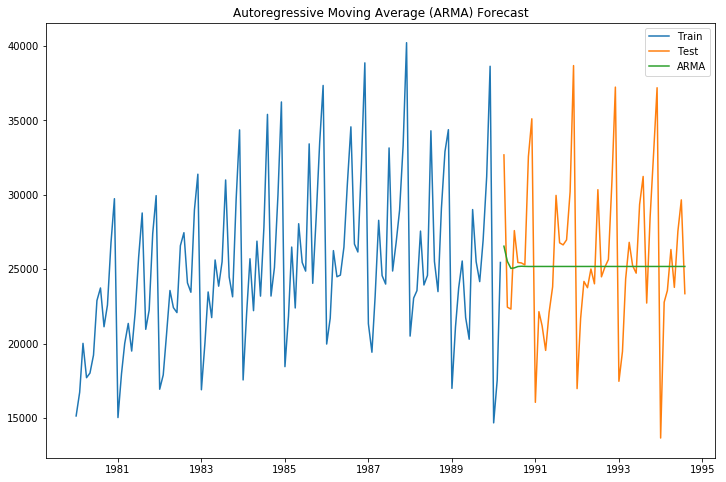

RMSE = 5207.6972660055135


In [76]:
AR_forecasting(df,'Sales',0.7, 2,0)